# Assignment 

For the assessment of this part of NPSC2001 unit, you will have to prepare a report by performing a series of _activities_ and then answering some questions.
Each activity/question is written in a Markdown cell and you can add your working/answer within the same cell or in any number cells that you may want to add before the next activity/question. 
Note that any python code has to be written in appropriate _code_ cell.

Alternatively, you can copy the questions in a Word document and write your report _as usual_.

The dotted lists can be removed and replaced with text, tables or graphs as appropriate.

The report will have two parts, one for the simulation of the mixing/demixing of simple fluids and one about the phase diagram of one of the noble gases.

**Each table or figure produced must have a meaningful caption**

-----------------

## Part 1 - Mixing

In this experience we will use a simple soft-sphere model to run molecular dynamics simulations of mixing/demixing and discuss how the intermolecular interaction define whether two substances will mix or not, and how this behaviour changes with temperature.
The soft-spheres interact with the well-known Lennard Jones potential and the total energy of the system can be written as

\begin{equation}
U= \sum_{i<j}4\varepsilon_{ij}\Big[ \Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^{12} - \Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^6 \Big]
\end{equation}

where $r_{ij}$ are the interatomic distances and the sum is done in such a way to avoid any __double counting__.

Several simulations have already been run before this lab and you can just visualise them to do the first few tasks.
All the simulations can be found the inside the preLabRun folder. 
Here you can see two folders, _layered_ and _random_, which correspond to two different starting configurations, where the two fluids are separated in a layered structure and where the fluids are fully mixed. Inside those two folders there are the individual simulations is stored in a folders named **TTT_EII_EIJ_EJJ** where:
- **TTT** is the temperature at which the simulation has been run 
- **EII** is the $\varepsilon_{ij}$ parameter (A-A interactions) in kJ/mol
- **EIJ** is the $\varepsilon_{ij}$ parameter (A-B interactions) in kJ/mol
- **EJJ** is the $\varepsilon_{jj}$ parameter (B-B interactions) in kJ/mol

Moreover, in those simulations the two "fluids" have the same _size_, $\sigma_{ii}=\sigma_{jj}$.

Here below there is a self-contained python script that you can use to visualise the trajectories. You can also find a notebook in the NPSC2001 folder named _visualisationOnly.ipynb_ with these commands. The only thing you have to change is the value of the variable runDir.

```python
import MDAnalysis as md
import nglview as ng

rootDir="./preLabRuns/mix/"
runDir="110_1.0_1.2/"
sys = md.Universe(rootDir+runDir+"mix.pdb", rootDir+runDir+"trajectory.0.dcd")

view = ng.show_mdanalysis(sys, gui=True)
view.center()
view.representations = [{"type": "spacefill", "params": {"sele": "all"}}]
view.camera = 'orthographic'
view
```

### What is the physical meaning of the $\sigma$ and $\varepsilon$ parameters?

### First have a look at the trajectories for a fictitious mixture of two identical fluids, where the cross-interactions are also equal to the same-same interactions, this would correspond to a mixture of two different isotopes of the same species, $\varepsilon_{ii}=\varepsilon_{ij}=\varepsilon_{jj}$.

- Are the two fluids completely mixed/separated at all temperatures?
- Does the final state (mixed/separated) depend on the initial configuration
- What is the driving force that drives the mixing/separation in those simulations?

### Let's now consider the case where the two fluids are still identical ($\varepsilon_{ii}=\varepsilon_{jj}=1.2$) but the cross interactions are different ($0.7\leq\varepsilon_{ij}\leq1.0$) 

- Do you expect the fluids to be miscible when $\varepsilon_{ij}=0.7$ ?
- What happens to the solubilities O into N and N into O when the temperature increases?
- Do you expect the phase diagram of this simple model would show a miscibility gap?
- In your opinion, how weaker would the cross-interaction need to be for that to happen? Look at the other simulations to see whether your prediction is correct.

### Does this make sense thermodynamically, let's make a back of the envelope calculation using a python notebook...
The free energy of mixing is

\begin{equation}
\Delta G_{mix} = \Delta H_{mix} - T\Delta S_{mix}
\end{equation}

The entropy of mixing is the well known term
\begin{equation}
\Delta S= -R\big[ x_1\ln x_1 +x_2\ln x_2 \big]
\end{equation}

Computing the enthalpy of mixing is a bit more complicated, but for the purpose of this exercise we can assume that:
- the particles interact only with their nearest neighbours (12 in this model)
- the interaction energy between two particles is equal to $\varepsilon$,
- in a completely disordered system half of each particle's neighbours are from the opposite species

This means that in a completely unmixed system we only have A-A and B-B interactions, while in a completely mixed system half of those interactions are of type A-B.

The short piece of code below is designed to perform such a calculation. The variable _dEpsilon_ represent the change in the interaction energy when a A-A (or B-B) interaction is replaced with an A-B interaction,  and _dNeigh_ is the number of neighbours that have changed to be of the other species.
The parameters currently defined in the code work for the case where $\varepsilon_{ii}=\varepsilon_{ij}=\varepsilon_{jj}$
and therefore there change in type of neighbours is irrelevant and was set to zero.
Mind the double counting of the interactions

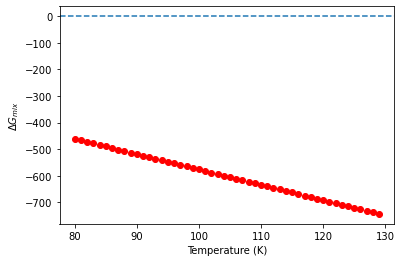

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dEpsilon = 0 # <- replace this with actual value(s)
dNeigh = 0 # <- replace this with the correct number for this system

dS = -8.314 * (0.5*np.log(0.5) + 0.5*np.log(0.5)) # in J/mol/K
dH = dEpsilon * dNeigh

x=[]
y=[]
for T in range(80,130):
    x.append(T)
    y.append(dH - T*dS)
    
fig=plt.figure()
ax = fig.gca()
ax.scatter(x,y,color="red")
ax.axhline(0,linestyle = 'dashed')
ax.set(xlabel="Temperature (K)")
ax.set(ylabel="$\Delta G_{mix}$")
plt.show()

### How does our back of the envelope calculation compare with the simulations' results?

### So far we have only discussed the effect of the intermolecular forces on the mixing/demixing properties of a solution. As a take-home exercise, choose one set of interaction parameters for which you would expect to observe a miscibility gap, double the size of either "O" or "N" in the runOpenMM.py input file and run the simulations. This simulation would be representative of a mixture of spherical colloidal particles of different sizes.

- Analyse the simulation and take some screen shots to support your observations
- Comment on the results

-----------------


## Part 2 - Phase diagram

This experience will walk you through all the steps required to compute the phase diagram of a material using molecular dynamics simulations. These procedure is general and can be applied to any material, but the computational tile will significantly increase with the complexity of the system.

You will have to run a series of simulations starting from different configurations (you can use the provided ones or create your own) and compute various properties of the system, which will allow you to build the phase diagram of the material. 

The provided Jupyter notebook for this activity allows you to choose which ideal gas you want to compute the phase diagram for between:
- [Ne](https://encyclopedia.airliquide.com/neon#properties)
- [Ar](https://encyclopedia.airliquide.com/argon#properties)
- [Kr](https://encyclopedia.airliquide.com/krypton#properties)
- [Xe](https://encyclopedia.airliquide.com/xenon#properties)

Follow the links for the properties of the material.

### What are the experimental thermo-physical properties of the material
- Melting temperature
- Critical temperature 
- Triple point of the material
- Molar enthalpy of fusion and vaporisation
- Molar volume of fusion and vaporisation

### Determine the melting temperature of the material by running a series of simulations at increasing temperature starting from its crystalline structure (fcc.pdb).

- Choose a suitable range of temperatures around the experimental melting temperature, +/- 50 K
- Use increments of 5 or 10 degrees
- Each simulation should be XXX ps long
- Set the ensemble to NPT_iso
- Prepare a plot of the average potential energy in each run computed from the portion of simulation that is at equilibrium

### Determine the melting temperature of the material by running a series of simulations at decreasing temperature starting from its liquid configuration (liquid.pdb).

- Use the same temperatures that you chose in the previous step
- Each simulation should be XXX ps long
- Set the ensemble to NPT_iso
- Prepare a plot of the average potential energy in each run computed from the portion of simulation that is at equilibrium

### Determine the melting temperature of the material by running a series of simulations at increasing temperature starting from its the solid/liquid interface configuration (interface.pdb).

- Use the same temperatures that you chose in the previous step
- Each simulation should be XXX ps long
- Set the ensemble to NPT_ortho
- Prepare a plot of the average potential energy in each run computed from the portion of simulation that is at equilibrium

### Plot the average potential energies obtained for the three runs in one graph and discuss whether the three methods give you the same melting temperature and if not explain which method is more accurate and why.

### Using the data from the most accurate method, plot the average volume _vs_ temperature.

### Compute the molar enthalpy of fusion and molar enthalpy of vaporisation.
- Assume that enthalpy and potential energy are equivalent at ambient conditions $\approx 0$

### Run a series of simulations at increasing temperature starting from its the liquid/vapour configuration
- Choose a suitable range of temperatures starting from the triple point up to just above the critical temperature
- Use increments of 5 or 10 degrees 
- Each simulation should be XXX ps long
- Set the ensemble to NVT, _i.e._ the NPT flags should be false
- Compute and plot the average density profile from the simulation output and extract the density of the gas at each temperature.

### Assuming the gas behaves ideally, compute the vapour pressure of the gas using the ideal gas law and build the liquid/vapour phase boundary

### Compute the molar enthalpy and molar volume of vaporisation of the material using the Clausius-Clapeyron equation

### Compute the solid/liquid phase boundary using the Clapeyron equation and add it to the liquid/vapour phase boundary

### Locate the triple point of on the phase diagram

### Assuming the the molar enthalpy of sublimation is the sum the enthalpies of fusion and evaporation, compute the solid/liquid branch of the phase diagram

### Overlay the experimental phase diagram with the one you have computed

### Compare your phase diagram and all the thermo-physical properties that you have computed in this experience with the experimental ones. What are the likely sources of the discrepancies?